In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
df=pd.read_csv("NCDB_2014.csv")

/Users/linghao/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1,2,5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,2014,1,1,10,2,1,02,03,1,3,...,1,01,UUUU,01,M,75,11,2,NN,1
1,2014,1,1,12,2,1,04,UU,1,5,...,1,01,UUUU,01,F,21,11,2,02,1
2,2014,1,1,00,2,1,03,UU,7,3,...,1,01,UUUU,01,F,34,11,2,02,1
3,2014,1,1,17,2,2,21,UU,1,1,...,1,01,UUUU,01,F,50,11,2,02,1
4,2014,1,1,17,2,2,21,UU,1,1,...,2,01,UUUU,01,M,63,11,1,NN,1


In [4]:
df.columns

Index(['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_SEV', 'C_VEHS', 'C_CONF',
       'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE',
       'V_YEAR', 'P_ID', 'P_SEX', 'P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE',
       'P_USER'],
      dtype='object')

## Data Cleaning

we are going to do a bit of data cleaning. First, we will treat all Unknown and Not Provided Values as na Values

In [4]:
df=df.replace('UU',np.nan)

In [5]:
df=df.replace('XX',np.nan)              

In [6]:
df=df.replace('U',np.nan)

In [7]:
df=df.replace('X',np.nan)

In [8]:
df=df.replace('QQ',np.nan)

In [9]:
df=df.replace('Q',np.nan)

In [10]:
df=df.replace('UUUU',np.nan)

In [11]:
df=df.replace('XXXX',np.nan)

In [12]:
df=df.replace('NN',np.nan)

In [13]:
df=df.replace('NNNN',np.nan)

In [14]:
df=df.replace('N',np.nan)

After treating all the null values, we need to split our data into two parts, a training set, and a test set in 20%

In [15]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(df,test_size=0.2)

Let's explore the realtions in the train set

In [16]:
df=train_set

## Visualisation

Let's do a scatter plot on the attributes we have converted to numerical numbers

In [148]:
attributes=['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_SEV', 'C_VEHS','V_YEAR','P_AGE']

In [157]:
df[attributes]=df[attributes].apply(lambda x:pd.to_numeric(x))

/Users/linghao/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 2014.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/Users/linghao/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 2014.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/linghao/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 2014.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])


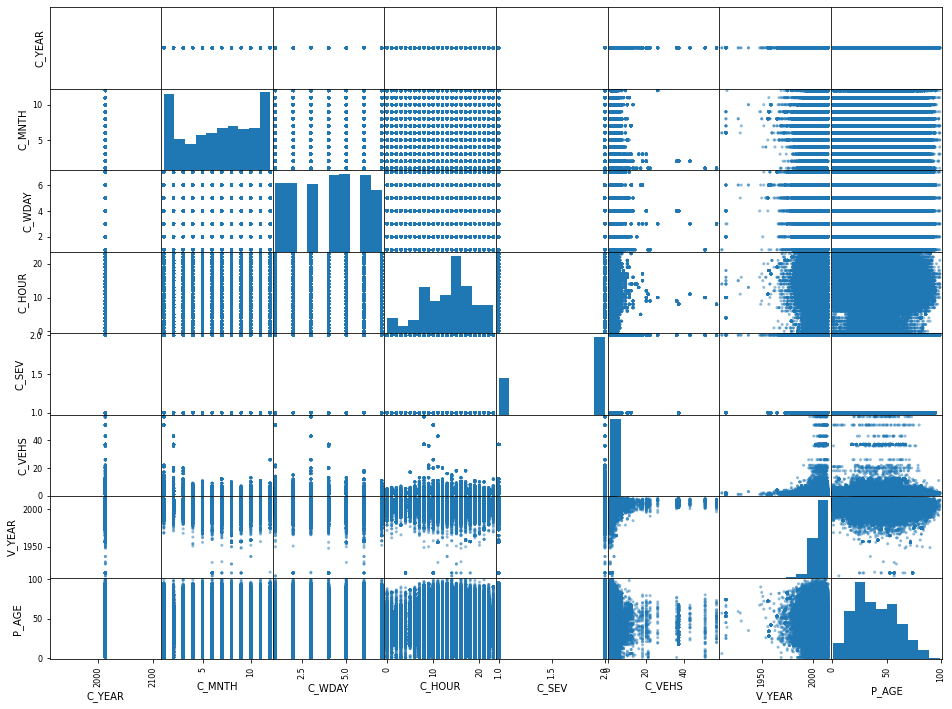

In [158]:
scatter_matrix(df[attributes],figsize=(16,12))
plt.show()

We see that our response variable, C_SEV, has a reallu lopsided distribution, most of the cases are non fatal. While this is a logical conclusion, we are interested in predictiong fatal collisions, so let's try to adjust the distribution.

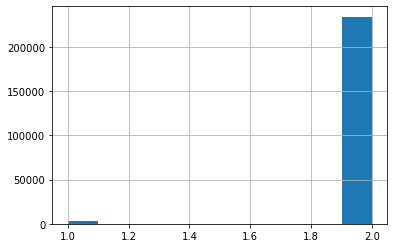

In [17]:
df['C_SEV'].hist()

From the graph, an overwhelming amont of the collisions are non fatal. But if we are interested in predicting fatal collisions, which are more important to us than non-fatal ones, we nned to significantly increase the fatal portion of ourdata.

In [18]:
df_FATAL=pd.concat([df[df['C_SEV']==1]]*30,ignore_index=True)

In [19]:
df=pd.concat([df,df_FATAL],ignore_index=True)

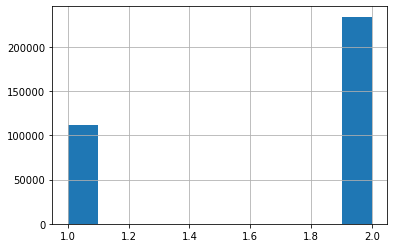

In [20]:
df['C_SEV'].hist()

As you can see, I have significantly increased fatal portion by dupicating the existing fatal portion record 30 times. Now, let's plot our scatte matrix again

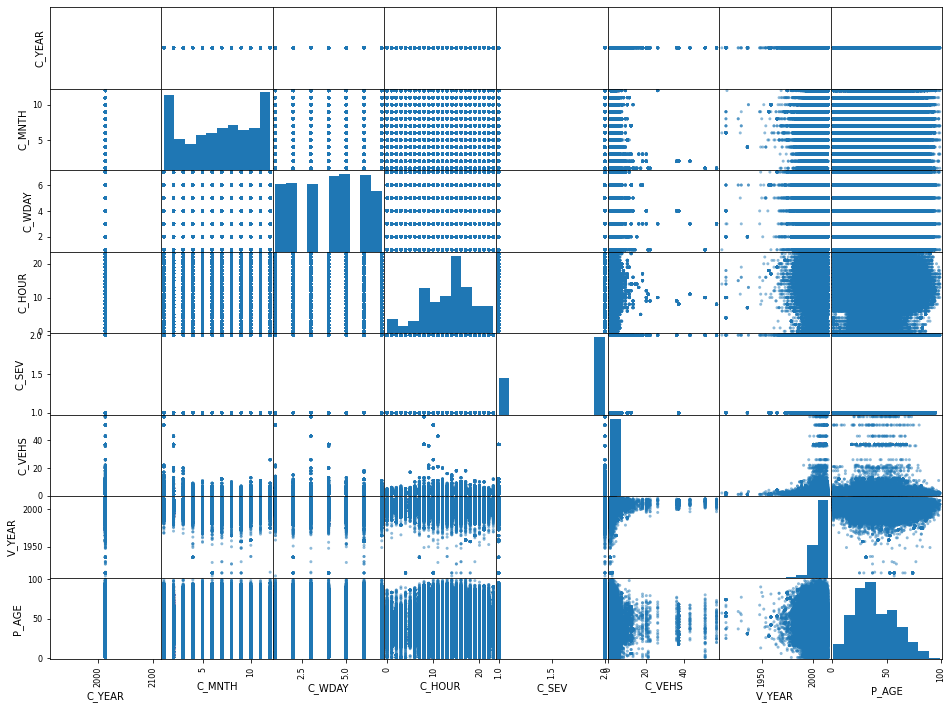

In [453]:
scatter_matrix(df[attributes],figsize=(16,12))
plt.show()

Let's zoom in on a few graphs

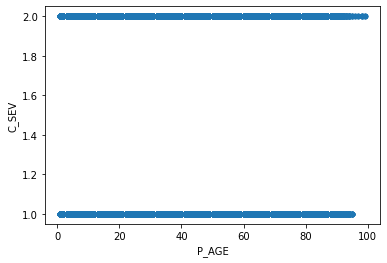

In [454]:
df.plot(kind="scatter",x='P_AGE',y='C_SEV',alpha=0.5)
plt.show()

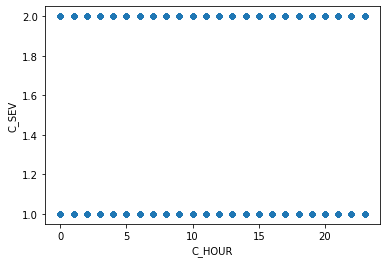

In [455]:
df.plot(kind="scatter",x='C_HOUR',y='C_SEV',alpha=0.5)
plt.show()

The relation is not obvious, so let's do a 4D color map

Let's Engineer a feature called vehicle age,whic is the current year(2020-Vehicle Year)

In [456]:
df['V_AGE']=2020-df.V_YEAR

Let's plot a 4D graph,the X axis the the person's age, the y axis is the number of collisin vehicles. Interestingly, the radius of the circle is the vehicle's age while the color represents the severity.

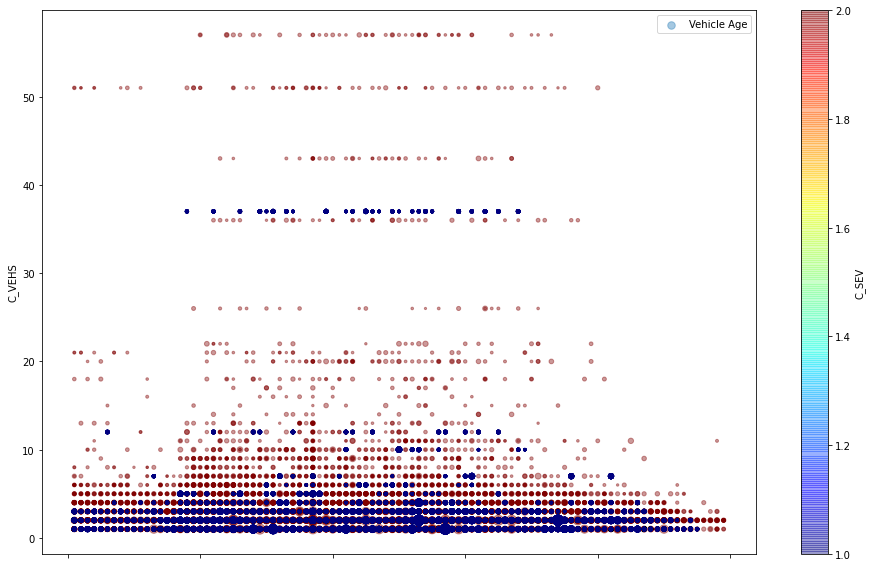

In [458]:
df.plot(kind="scatter",x='P_AGE',y='C_VEHS',alpha=0.4,
            s=df['V_AGE'],label="Vehicle Age",figsize=(16,10),
            c='C_SEV',cmap=plt.get_cmap("jet"),colorbar=True,)
plt.legend()
plt.show()

Intrestingly, most severe cases involve less than 15 vehicles, and most of the the sever cases also have larger radius, implying an older model is involved

There is clearly some pattern here, but what is it? Let's try to find out. 

## Using Pipeline to Preprocess Data

Let's handle the categorical attributes

In [21]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

Create two separate pipelines, one for categorical attributes, one for the numerical attributes

In [22]:
cat_pipeline=Pipeline([
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("onehot",OneHotEncoder()),
])

In [23]:
num_pipeline=Pipeline([
    ("imputer",SimpleImputer(strategy="mean")),
    ("std_scaler",StandardScaler()),
])

Combine two pipelines into a single pipeline

In [24]:
num_attribs=['C_YEAR','C_MNTH', 'C_WDAY', 'C_HOUR','C_VEHS','P_AGE','V_YEAR']

In [25]:
cat_attribs=['C_CONF','C_RCFG', 'C_WTHR','C_RSUR', 'C_RALN', 'C_TRAF', 'V_TYPE', 'P_SEX','P_PSN', 
             'P_ISEV', 'P_SAFE', 'P_USER']

In [34]:
from sklearn.compose import ColumnTransformer

Get the total pipleline

In [35]:
full_pipeline=ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",cat_pipeline,cat_attribs),
])

Create X_training, y_training, X_test, y_testing

In [27]:
X_train=df.iloc[:,[0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]

In [28]:
y_train=df.iloc[:,[4]]

In [29]:
y_train=y_train==1

In [30]:
X_test=test_set.iloc[:,[0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]

In [31]:
y_test=test_set.iloc[:,[4]]

In [32]:
y_test=y_test==1

In [36]:
X_train_prepared=full_pipeline.fit_transform(X_train)

In [37]:
X_test_prepared=full_pipeline.fit_transform(X_test)

## Machine Learning Model Application
Since we are trying to predict the severity, I have decided to go with several classification models

First, we have over 120 features,this will undoubtedly slow our training and cost unncessary processing power. I have decided to go with PCA to reduce the dimensions

## Apply Dimensionality Reduction Techniques

In [38]:
X_train_prepared.shape

(346029, 120)

In [39]:
from sklearn.decomposition import PCA

Let's try to find the number of dimensions needed to contain 99.5% of the variance

In [40]:
pca=PCA()
pca.fit(X_train_prepared.toarray())
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1

In [41]:
d

35

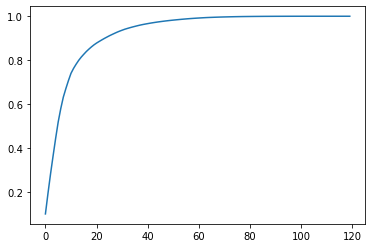

In [42]:
plt.plot(cumsum)
plt.show()

We only need 35 dimensions to retain 95% of the variance, this will undoubtedly speed up training and machine learning process

In [43]:
pca=PCA(n_components=35)

In [44]:
X32D_train=pca.fit_transform(X_train_prepared.toarray())

In [45]:
X32D_test=pca.transform(X_test_prepared.toarray())

Now, let's apply several ML models

### Stochastic Gradient Descent
Let's train a binary clssifier using SGD

In [120]:
from sklearn.linear_model import SGDClassifier

In [121]:
sgd_clf=SGDClassifier()

In [122]:
sgd_clf.fit(X32D_train,y_train.values.ravel())

SGDClassifier()

In [123]:
from sklearn.model_selection import cross_val_score

Performance measure

In [124]:
cross_val_score(sgd_clf,X32D_test,y_test.values.ravel(),cv=3,scoring="accuracy")

array([0.99057507, 0.99107908, 0.99082708])

To set the binary threshold, let's plot the decision socres

In [125]:
from sklearn.model_selection import cross_val_predict

In [126]:
y_train_predict=cross_val_predict(sgd_clf,X32D_test,y_test.values.ravel(),cv=3)

Let's build a confusion matrix 

In [127]:
from sklearn.metrics import confusion_matrix

In [128]:
confusion_matrix(y_test.values.ravel(),y_train_predict)

array([[58619,     0],
       [  542,   362]])

Plot the precision, recall curve

In [129]:
y_scores=cross_val_predict(sgd_clf,X32D_train,y_train.values.ravel(),cv=3,
                          method="decision_function")

In [130]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train.values.ravel(),y_scores)

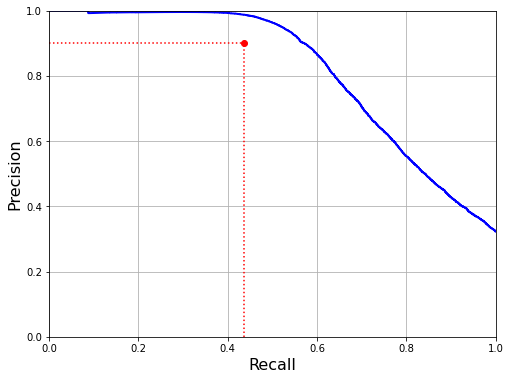

In [131]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
plt.show()

In [132]:
from sklearn.metrics import roc_curve

In [133]:
fpr,tpr,thresholds=roc_curve(y_train.values.ravel(),y_scores)

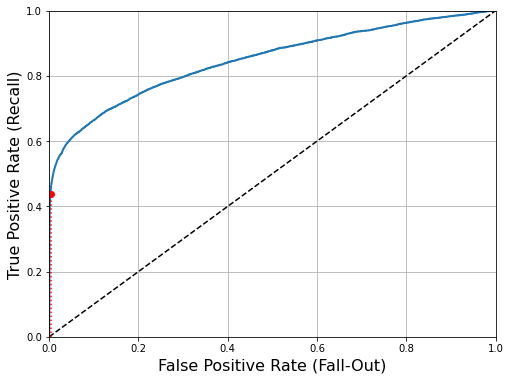

In [134]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                   
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                         
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") 
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  
plt.plot([4.837e-3], [0.4368], "ro")               
plt.show()

In [135]:
from sklearn.metrics import roc_auc_score

In [136]:
roc_auc_score(y_train.values.ravel(),y_scores)

0.8480832952044769

### Bagging Classifier

In [46]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [47]:
#contains an ensemble of 500 Decision Tree classifiers
bag_clf=BaggingClassifier(
    DecisionTreeClassifier(),n_estimators=500,
    max_samples=100,bootstrap=True,oob_score=True,n_jobs=6
)

In [48]:
bag_clf.fit(X32D_train,y_train.values.ravel())

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=6, oob_score=True)

out of bag score(should be similar to test accuracy)

In [49]:
bag_clf.oob_score_

0.8314447633001858

In [50]:
y_pred_bag=bag_clf.predict(X32D_test)

In [58]:
accuracy_score(y_pred_bag,y_test.values.ravel())

0.9594610486702619

confusion matrix

In [53]:
confusion_matrix(y_test.values.ravel(),y_pred_bag)

array([[56621,  1998],
       [  415,   489]])

plot the roc curve

In [ ]:
y_probas_bag=cross_val_predict(bag_clf,X32D_train,y_train.values.ravel(),cv=3,
                                 method="predict_proba")

In [63]:
y_scores_bag=y_probas_bag[:,1]

In [68]:
fpr_bag,tpr_bag,thresholds_bag=roc_curve(y_train.values.ravel(),y_scores_bag)

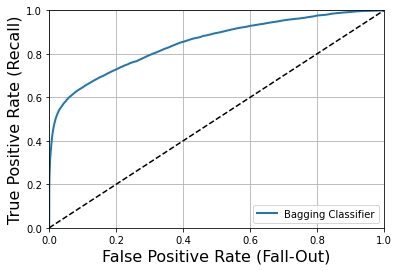

In [69]:
plot_roc_curve(fpr_bag,tpr_bag,"Bagging Classifier")
plt.legend(loc="lower right")
plt.show()

In [73]:
roc_auc_score(y_train.values.ravel(),y_scores_forest)

0.8510648842778458

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
param_grid=[
    {'n_estimators':[300,400,500,600,700,800],'max_samples':[50,100,150]},
]

In [104]:
grid_search=GridSearchCV(bag_clf,param_grid,cv=5,
                        scoring='accuracy',
                         return_train_score=True)

In [ ]:
grid_search.fit(X32D_train,y_train.values.ravel())

## Random Forests

In [75]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf=RandomForestClassifier(n_estimators=500,max_leaf_nodes=20,n_jobs=6)

In [76]:
rnd_clf.fit(X32D_train,y_train.values.ravel())

RandomForestClassifier(max_leaf_nodes=20, n_estimators=500, n_jobs=6)

In [55]:
from sklearn.metrics import accuracy_score

In [77]:
y_pred_rf=rnd_clf.predict(X32D_test)

In [78]:
accuracy_score(y_test.values.ravel(),y_pred_rf)

0.9742620499638796

In [79]:
confusion_matrix(y_test.values.ravel(),y_pred_rf)

array([[57541,  1078],
       [  454,   450]])

In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
param_grid=[
    {'n_estimators':[500,1000,1500],'max_samples':[50,100,300,500,]},
]

In [109]:
grid_search=GridSearchCV(bag_clf,param_grid,cv=5,
                        scoring='f1',
                         return_train_score=True)

In [115]:
rnd_clf.predict_proba(X32D_train)

array([[0.87591506, 0.12408494],
       [0.86360718, 0.13639282],
       [0.74947573, 0.25052427],
       ...,
       [0.73974619, 0.26025381],
       [0.27511619, 0.72488381],
       [0.34171247, 0.65828753]])

Plot ROC curve

In [89]:
y_probas_forest=cross_val_predict(rnd_clf,X32D_train,y_train.values.ravel(),cv=3,
                                 method="predict_proba")

In [90]:
y_scores_forest=y_probas_forest[:,1]

In [91]:
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_train.values.ravel(),y_scores_forest)

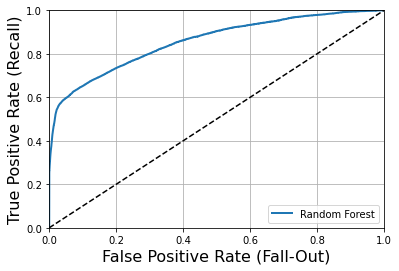

In [92]:
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.legend(loc="lower right")
plt.show()

In [93]:
roc_auc_score(y_train.values.ravel(),y_scores_forest)

0.8568257285546332

## Boosting

Let's try a boosting method now

## Adaboost

In [86]:
from sklearn.ensemble import AdaBoostClassifier

In [97]:
ada_clf=AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),n_estimators=200,
    algorithm="SAMME.R",learning_rate=0.5,
)

In [98]:
ada_clf.fit(X32D_train,y_train.values.ravel())

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [99]:
y_predict_ada=ada_clf.predict(X32D_test)

In [100]:
accuracy_score(y_predict_ada,y_test.values.ravel())

0.9513801387698873

In [101]:
confusion_matrix(y_test.values.ravel(),y_predict_ada)

array([[56091,  2528],
       [  366,   538]])

Plot the ROC curve

In [102]:
y_probas_ada=cross_val_predict(ada_clf,X32D_train,y_train.values.ravel(),cv=3,
                                 method="predict_proba")

In [103]:
y_scores_ada=y_probas_ada[:,1]

In [104]:
fpr_ada,tpr_ada,thresholds_ada=roc_curve(y_train.values.ravel(),y_scores_ada)

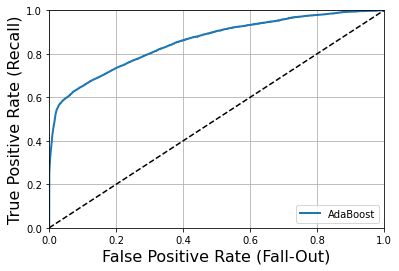

In [117]:
plot_roc_curve(fpr_forest,tpr_forest,"AdaBoost")
plt.legend(loc="lower right")
plt.show()

In [106]:
roc_auc_score(y_train.values.ravel(),y_scores_ada)

0.9016928940239027

So far, adaboost has the highest AUC. Let's just test out one more boosting method

### XGBoost

Let's run a extreme gradien boost. I am using Che TianQi's xgboost package instead of sklearn's gradient boost

In [107]:
import xgboost

In [108]:
xgb_clf=xgboost.XGBClassifier()

In [109]:
xgb_clf.fit(X32D_train,y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [110]:
y_pred_xgb=xgb_clf.predict(X32D_test)

In [111]:
accuracy_score(y_pred_xgb,y_test.values.ravel())

0.9758916721267409

In [112]:
y_probas_boost=cross_val_predict(xgb_clf,X32D_train,y_train.values.ravel(),cv=3,
                                 method="predict_proba")

In [113]:
y_scores_boost=y_probas_boost[:,1]

In [114]:
fpr_boost,tpr_boost,thresholds_boost=roc_curve(y_train.values.ravel(),y_scores_boost)

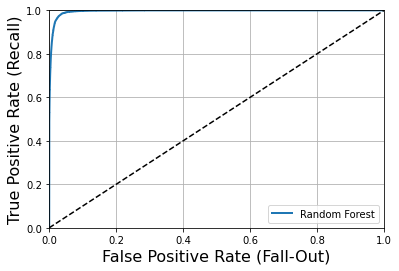

In [116]:
plot_roc_curve(fpr_boost,tpr_boost,label="XGBoost")
plt.legend(loc="lower right")
plt.show()

In [118]:
roc_auc_score(y_train.values.ravel(),y_scores_boost)

0.9957304328125807

In [119]:
confusion_matrix(y_test.values.ravel(),y_pred_xgb)

array([[57557,  1062],
       [  373,   531]])

XGBoost is indeed our best performer

## Ensemble Voting Classifer
Now, let's build a voting classifer from all the models we have so far. I will utilize soft voting. because:
1. All of the classifiers we have so far have the predict_proba method(SKLearn relies on duck typing)
1. soft voting gies more confident classifier more weights

In [137]:
from sklearn.ensemble import VotingClassifier

In [138]:
voting_clf=VotingClassifier(
    estimators=[('xgb',xgb_clf),('ada',ada_clf),('rnd',rnd_clf),('bag',bag_clf)],
    voting='soft'
)

In [139]:
voting_clf.fit(X32D_train,y_train.values.ravel())

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=0,
                                            num_...
                                            validate_parameters=1,
                                            ver

In [140]:
y_pred_vot=voting_clf.predict(X32D_test)

Our best predictor is the ensemble method,it has the highest accuracy(98%)

In [141]:
accuracy_score(y_pred_vot,y_test.values.ravel())

0.9800917292475178

In [142]:
confusion_matrix(y_test.values.ravel(),y_pred_vot)

array([[57843,   776],
       [  409,   495]])

Now let's plot the ROC curve

In [143]:
y_probas_vot=cross_val_predict(voting_clf,X32D_train,y_train.values.ravel(),cv=3,
                                 method="predict_proba")

In [144]:
y_scores_vot=y_probas_vot[:,1]

In [145]:
fpr_vot,tpr_vot,thresholds_vot=roc_curve(y_train.values.ravel(),y_scores_vot)

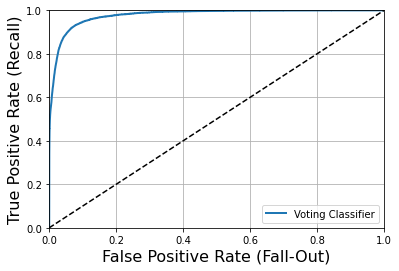

In [146]:
plot_roc_curve(fpr_vot,tpr_vot,label="Voting Classifier")
plt.legend(loc="lower right")
plt.show()

In [147]:
roc_auc_score(y_train.values.ravel(),y_scores_vot)

0.9775899941658871